# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("new_covid7.csv")


In [4]:
df.shape

(214894, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214894 entries, 0 to 214893
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      214894 non-null  int64 
 1   Country/Region  214894 non-null  object
 2   Date            214894 non-null  object
 3   Confirmed       214894 non-null  int64 
 4   Deaths          214894 non-null  int64 
 5   Recovered       214894 non-null  int64 
 6   Active          214894 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ MB


In [6]:
df.describe()

,Unnamed: 0,Confirmed,Deaths,Recovered,Active
count,214894.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05
mean,107446.500000,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05
std,62034.698711,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,53723.250000,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,107446.500000,5.223000e+03,71.000000,4.500000e+01,1.243000e+03
75%,161169.750000,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04
max,214893.000000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

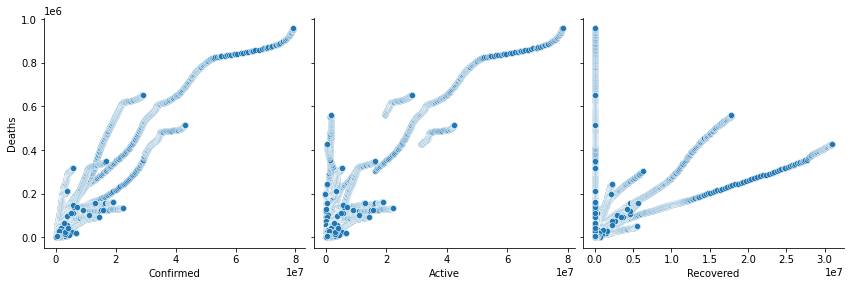

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, x_vars=['Confirmed', 'Active', 'Recovered'],
             y_vars='Deaths', size=4, aspect=1, kind='scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [9]:
X = df['Confirmed']
y = df['Deaths']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7,
                                                   test_size = 0.3, random_state = 100)

In [13]:
X_train


88461          992
65546           27
200949     7930528
90014         1009
89464        58285
            ...   
65615       565446
77655         5253
210755    28072238
56088        52825
38408          261
Name: Confirmed, Length: 150425, dtype: int64

In [14]:
y_train

88461          6
65546          0
200949     90620
90014         17
89464         29
           ...  
65615      11667
77655         92
210755    643340
56088       1759
38408          3
Name: Deaths, Length: 150425, dtype: int64

In [15]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [16]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const        1855.574286
Confirmed       0.016231
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 8.858e+05
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:26:35   Log-Likelihood:            -1.6885e+06
No. Observations:              150425   AIC:                         3.377e+06
Df Residuals:                  150423   BIC:                         3.377e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1855.5743     47.441     39.113      0.000    1762.591    1948.557
Confirmed      0.0162   1.72e-05    941.186      0.000       0.016       0.016
==============================================================================
Omnibus:                   165272.349   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         67756120.390
Skew:                           5.050   Prob(JB):                         0.00
Kurtosis:                     106.481   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

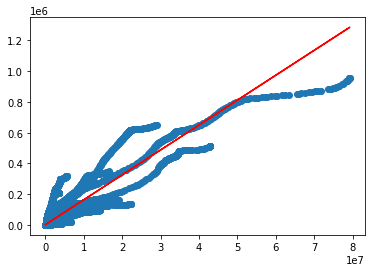

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1855.574 + 0.0162*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [20]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

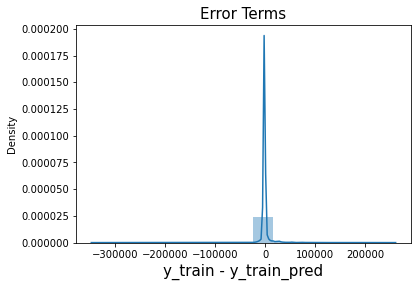

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.855
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really